In [7]:
import numpy as np
class Perceptron:
    """Perceptron Classifier
    
    Parameters
    ---------
    eta  :  float
        Rate between 0.0 and 1.0
    n_iter  : int
        Passes over training set
    random_state  :  int
        Random number generator seed for weight initialization
    
    Atributes
    ---------
    w_  : 1d-array
        Weights after fitting
    b_  : scalar
        Bias unit after fitting
        
    errors_  : list
        Number of misclassifications and thus updates in each epoch
        
    """

    def __init__(self, eta = .01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.
        
        Arguments
        ----------
        X  :  {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of training examples and n_features is the number of featrues.
        y  :  array-like, shape = [n_examples]
            Target values
        
        Returns
        ---------
        self  :  object
        
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01,
                                size = X.shape[1])
        self.b_ = np.float_(0.0)
        self.errors_ = []

        for iter in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update*xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) > 0.0, 1, 0)




In [16]:
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/'\
    'machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s, header = None, encoding='utf-8')
df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


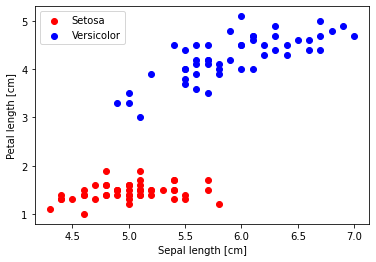

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Select sertosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# Extract sepal length and petal length
X = df.iloc[0:100, [0,2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color = 'red', label = 'Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color = 'blue', label = 'Versicolor')

plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc = 'upper left')
plt.show()

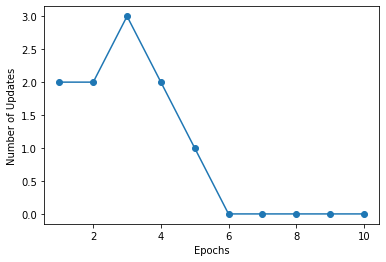

In [8]:
ppn = Perceptron(eta = .1, n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1),
            ppn.errors_, marker = 'o')
plt.xlabel("Epochs")
plt.ylabel('Number of Updates')
plt.show()

In [19]:
class AdalineGD():
    """ADAptive LInear NEuron classifier
    
    Parameters
    ----------
    eta  :  float
        Learning rate (between 0.0 and 1.0)
    n_iter  :  int
        Number of passess over training data
    random_state  :  int
        Random number generator seed for random weight init
        
    Attributes
    ------------
    w_  :  1d-array
        Weights after fitting
    b_  :   scalar
        Bias unit after fitting
    losses_  :  list
        Mean squared error loss function values in each epoch
        
    """

    def __init__(self, eta = 0.1, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
        Training vectors, where n_examples
        is the number of examples and
        n_features is the number of features.
        y : array-like, shape = [n_examples]
        Target values.
        Returns
        -------
        self : object
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = .01, size = X.shape[1])
        self.b_ = np.float_(0.0)
        self.losses_ = []

        for iter in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y-output)
            self.w_ += self.eta*2.0*X.T.dot(errors)/X.shape[0]
            self.b_ += self.eta*2.0*errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class unit after unit step"""
        return np.where(self.activation(self.net_input(X)) >= .5, 1, 0)
        

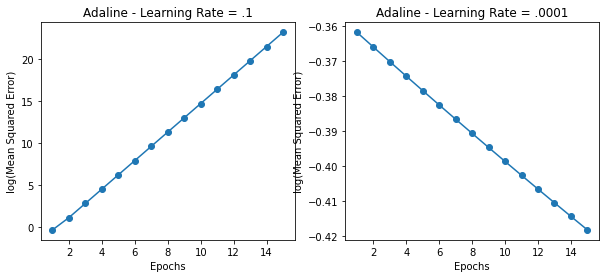

In [20]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ada1 = AdalineGD(n_iter = 15, eta = .1).fit(X,y)
ax[0].plot(range(1, len(ada1.losses_)+1),
                np.log10(ada1.losses_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean Squared Error)')
ax[0].set_title('Adaline - Learning Rate = .1')

ada2 = AdalineGD(n_iter = 15, eta = .0001).fit(X,y)
ax[1].plot(range(1, len(ada2.losses_)+1),
                np.log10(ada2.losses_), marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Mean Squared Error)')
ax[1].set_title('Adaline - Learning Rate = .0001')
plt.show()
